loading required packages and set working directory at the dataset's path 

In [45]:
library(ggplot2)
library(dplyr)
library(class)
setwd('c:/school work/big data/p2')

import the dataset

In [2]:
adultdata <- read.csv('adult.data', sep=',', header=FALSE)
adultdata.df <- as.data.frame(adultdata)
head(adultdata.df)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


update column name on original dataset

In [3]:
colnames(adultdata.df) <- c('age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
                           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
                           'native_country','income')
summary(adultdata.df)

      age                    workclass         fnlwgt       
 Min.   :17.00    Private         :22696   Min.   :  12285  
 1st Qu.:28.00    Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00    Local-gov       : 2093   Median : 178356  
 Mean   :38.58    ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00    State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00    Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)          :  981                    
         education     education_num                  marital_status 
  HS-grad     :10501   Min.   : 1.00    Divorced             : 4443  
  Some-college: 7291   1st Qu.: 9.00    Married-AF-spouse    :   23  
  Bachelors   : 5355   Median :10.00    Married-civ-spouse   :14976  
  Masters     : 1723   Mean   :10.08    Married-spouse-absent:  418  
  Assoc-voc   : 1382   3rd Qu.:12.00    Never-married        :10683  
  11th        : 1175   Max.   :16.00    Separated            : 1025  
 (Other)      : 5134  

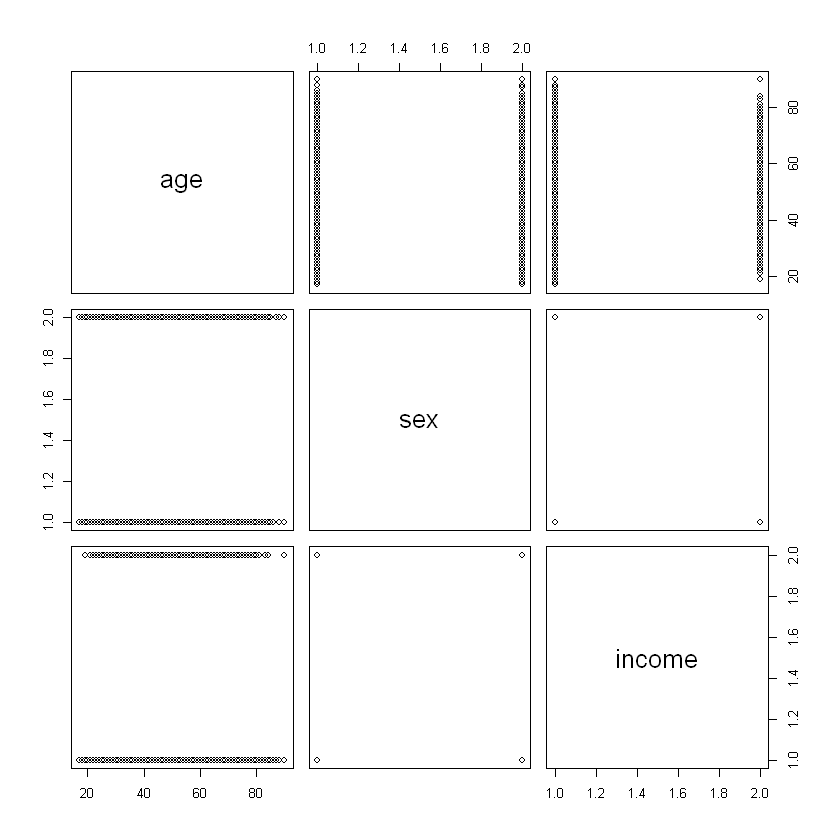

In [4]:
pairs(~age+sex+income,labels=c("age", "sex","income"), data=adultdata.df)

In [26]:
#delete rows which contain ? value
adultdata.df[adultdata.df == " ?"] <- NA
adult <- na.omit(adultdata.df)
summary(adult)

      age                    workclass         fnlwgt       
 Min.   :17.00    Private         :22286   Min.   :  13769  
 1st Qu.:28.00    Self-emp-not-inc: 2499   1st Qu.: 117627  
 Median :37.00    Local-gov       : 2067   Median : 178425  
 Mean   :38.44    State-gov       : 1279   Mean   : 189794  
 3rd Qu.:47.00    Self-emp-inc    : 1074   3rd Qu.: 237629  
 Max.   :90.00    Federal-gov     :  943   Max.   :1484705  
                 (Other)          :   14                    
         education    education_num                  marital_status 
  HS-grad     :9840   Min.   : 1.00    Divorced             : 4214  
  Some-college:6678   1st Qu.: 9.00    Married-AF-spouse    :   21  
  Bachelors   :5044   Median :10.00    Married-civ-spouse   :14065  
  Masters     :1627   Mean   :10.12    Married-spouse-absent:  370  
  Assoc-voc   :1307   3rd Qu.:13.00    Never-married        : 9726  
  11th        :1048   Max.   :16.00    Separated            :  939  
 (Other)      :4618          

explore Categorical Variables

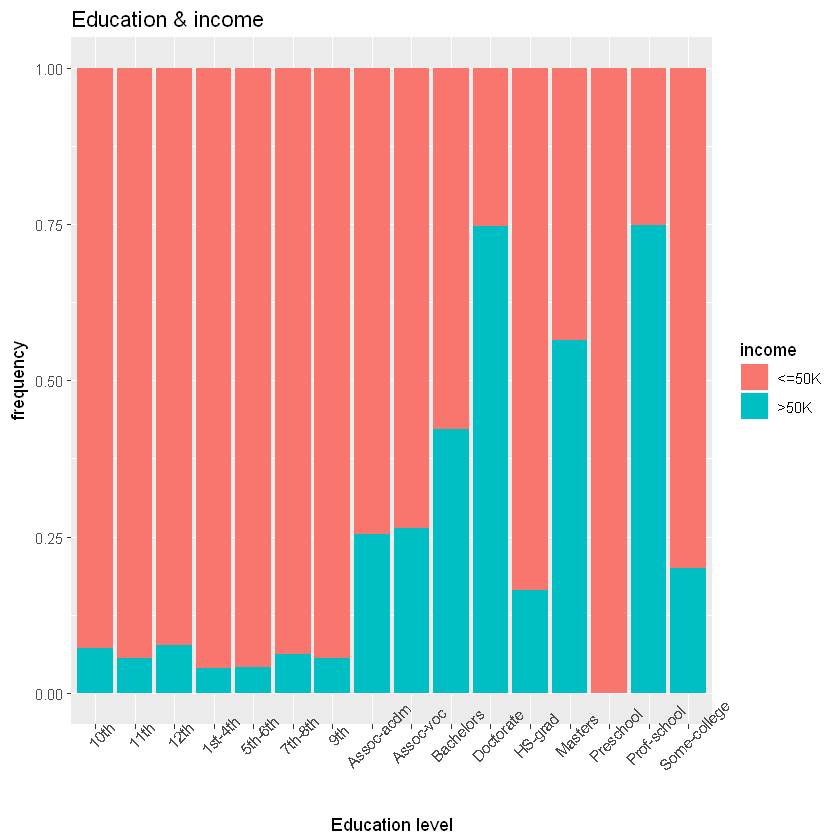

In [6]:
#education & income
ggplot(adult, aes(education, fill = income)) +
    geom_bar(position = 'fill') +
    ggtitle('Education & income') +
    xlab('Education level') +
    ylab('frequency')+
    theme(axis.text.x = element_text(angle = 45))

It seems like people who has higher education level do earn more income~

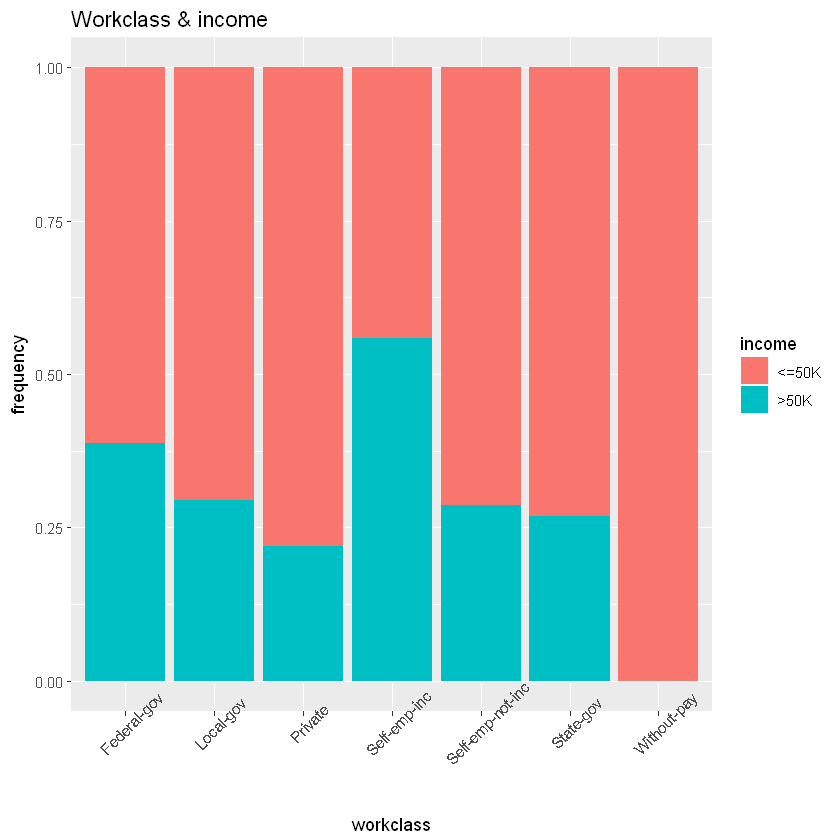

In [7]:
#workclass & income
ggplot(adult, aes(workclass, fill = income)) + 
    geom_bar(position="fill") + 
    theme(axis.text.x = element_text(angle = 45)) + 
    ylab('frequency') +
    ggtitle("Workclass & income")

workclass level has a strong relation with income,too

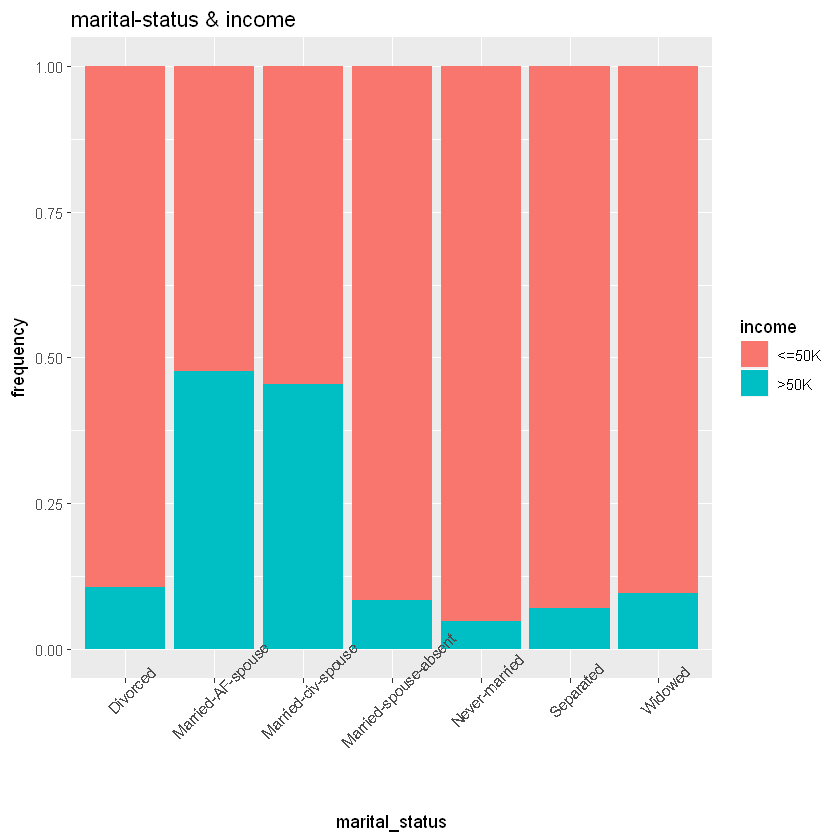

In [8]:
ggplot(adult, aes(marital_status, fill = income)) + 
    geom_bar(position="fill") + 
    theme(axis.text.x = element_text(angle = 45)) + 
    ylab('frequency') +
    ggtitle("marital-status & income")
    

Married-AF-spouse & Married-civ-spouse do have higher income. strong correlation !

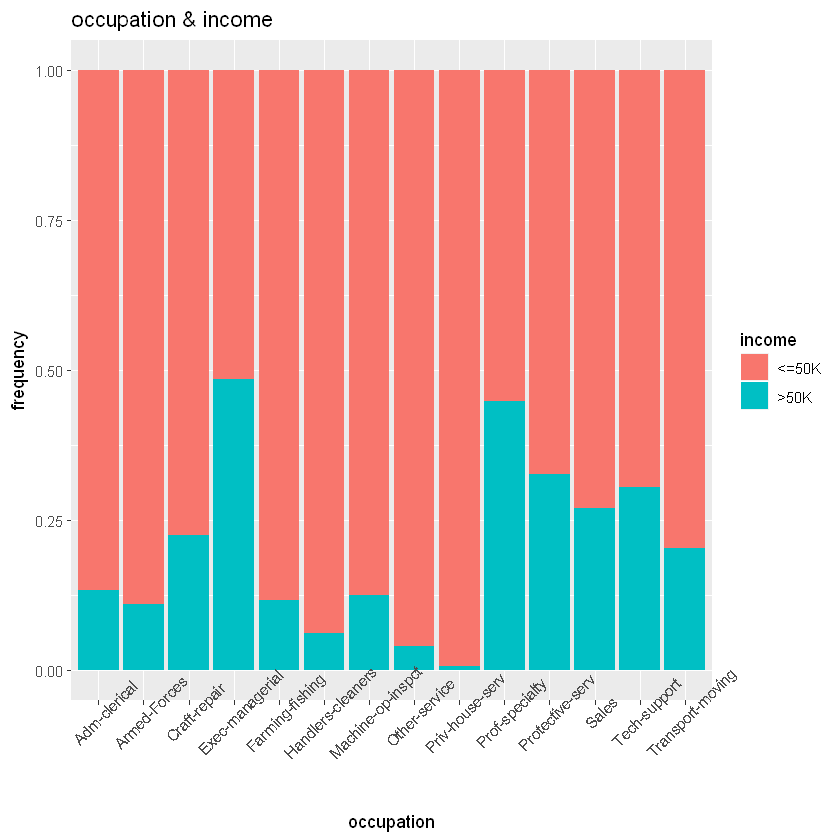

In [9]:
ggplot(adult, aes(occupation, fill = income)) +
    geom_bar(position='fill') +
    theme(axis.text.x = element_text(angle = 45)) +
    ylab('frequency') +
    ggtitle('occupation & income')

huge income differences between each occupation

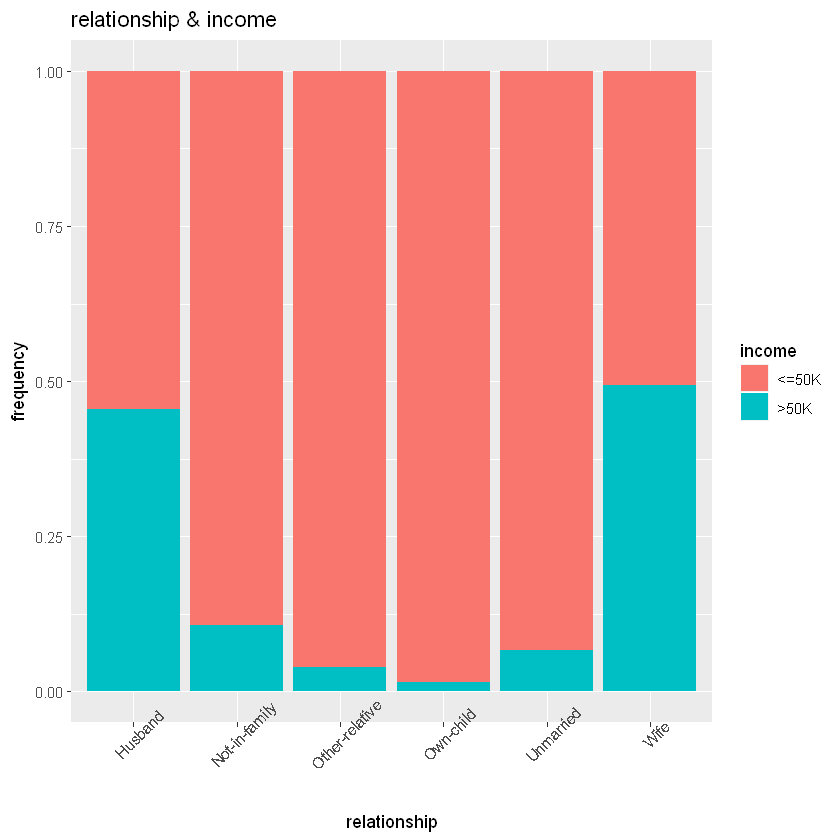

In [10]:
ggplot(adult, aes(relationship, fill = income)) +
    geom_bar(position='fill') +
    theme(axis.text.x = element_text(angle = 45)) +
    ylab('frequency') +
    ggtitle('relationship & income')

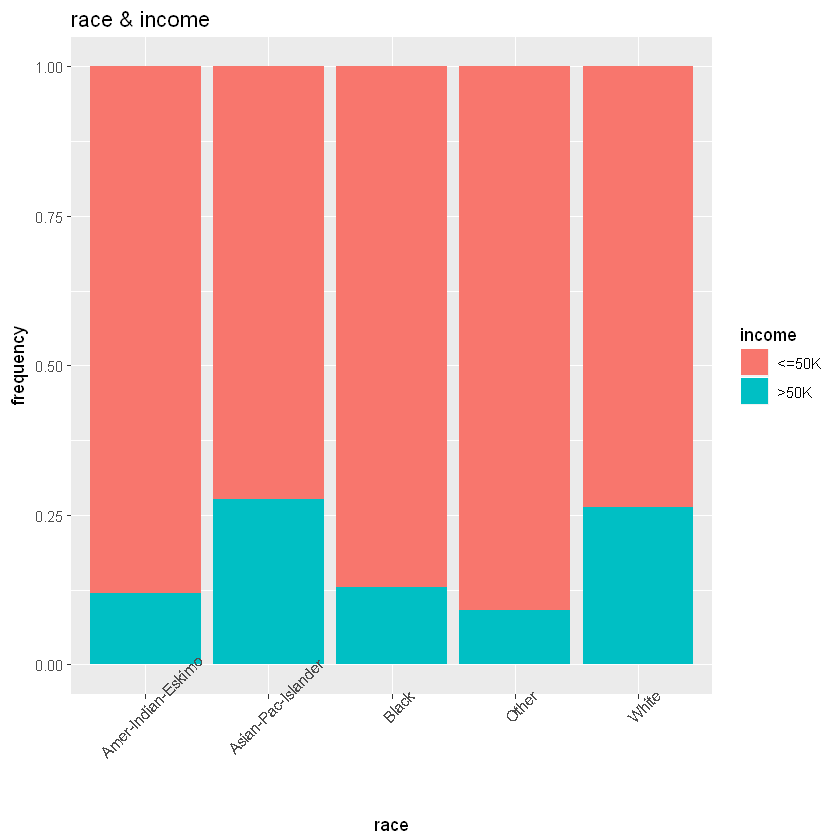

In [11]:
ggplot(adult, aes(race, fill = income)) +
    geom_bar(position='fill') +
    theme(axis.text.x = element_text(angle = 45)) +
    ylab('frequency') +
    ggtitle('race & income')

Asian & white tend to have more income

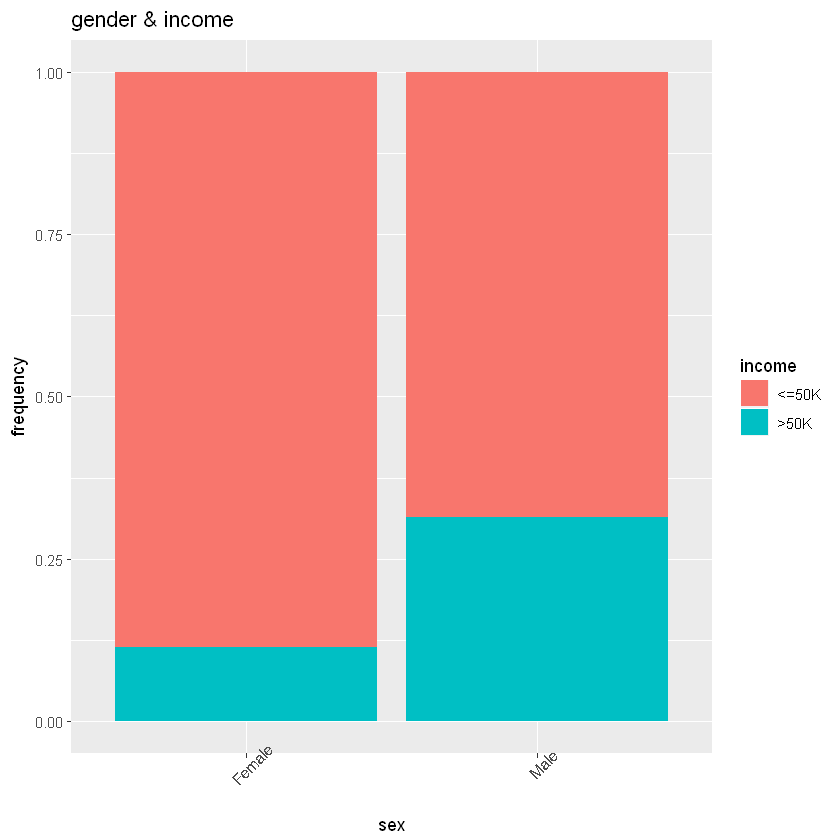

In [12]:
ggplot(adult, aes(sex, fill = income)) +
    geom_bar(position='fill') +
    theme(axis.text.x = element_text(angle = 45)) +
    ylab('frequency') +
    ggtitle('gender & income')

not very large difference(20%), not a strong relationship

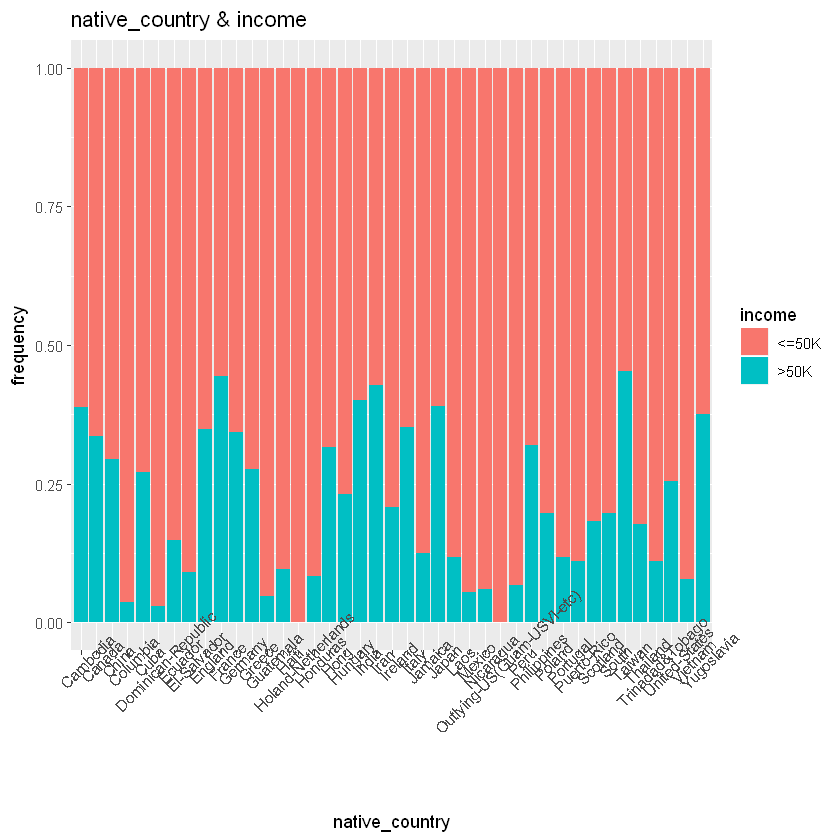

In [13]:
ggplot(adult, aes(native_country, fill = income)) +
    geom_bar(position='fill') +
    theme(axis.text.x = element_text(angle = 45)) +
    ylab('frequency') +
    ggtitle('native_country & income')

weak relationship between native_country and income

now we will look into continuous variables

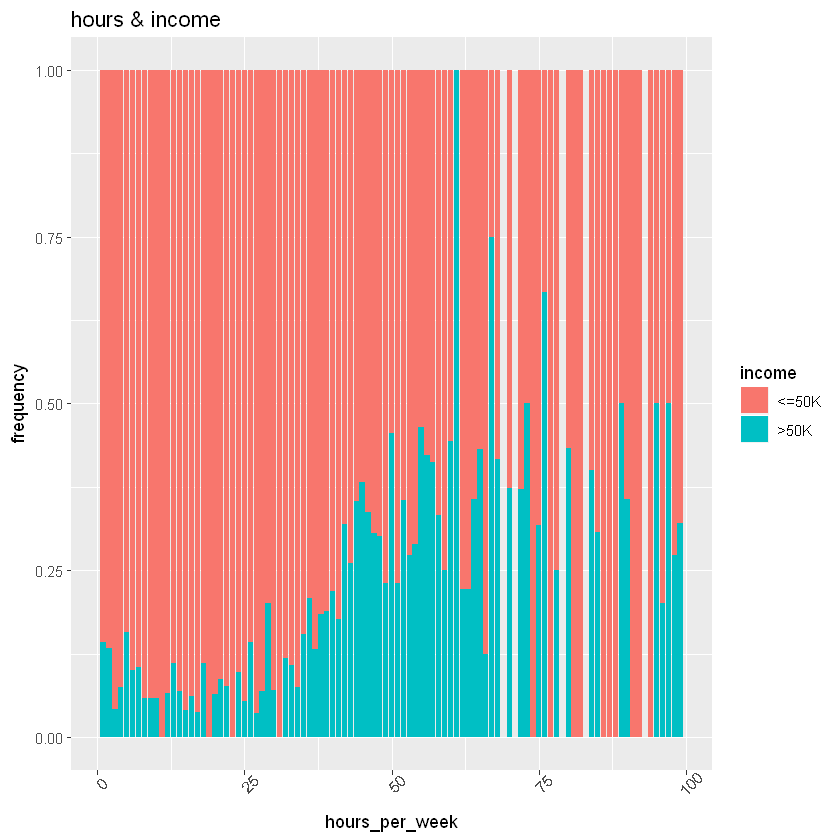

In [14]:
ggplot(adult, aes(hours_per_week, fill = income)) +
    geom_bar(position='fill') +
    theme(axis.text.x = element_text(angle = 45)) +
    ylab('frequency') +
    ggtitle('hours & income')

work harder == paid more? but still some people work for more then 75 hours per week cant get a 50k income

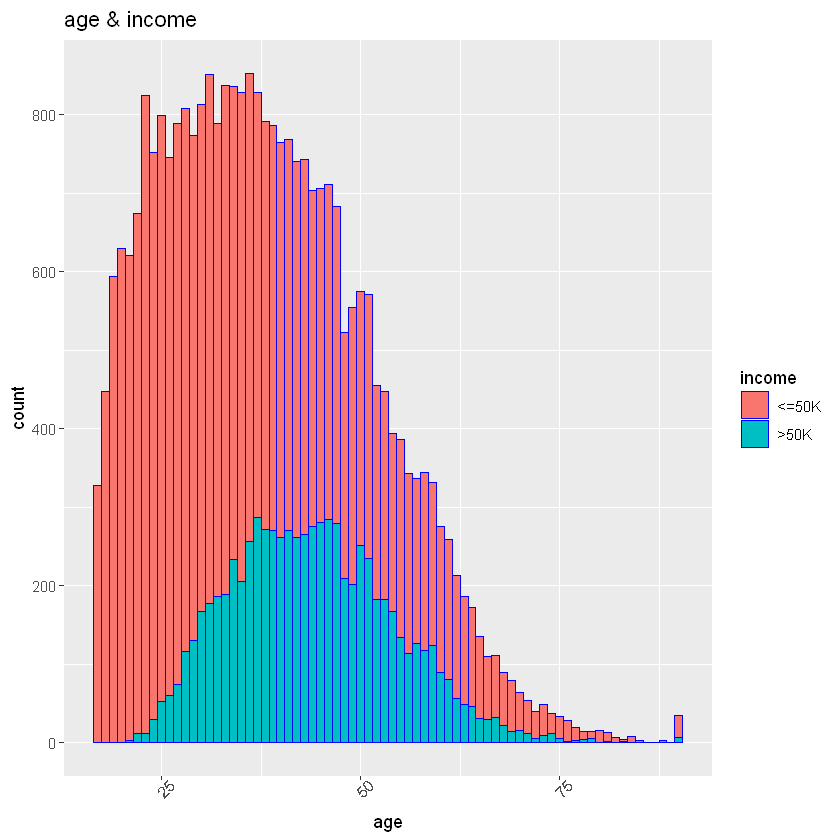

In [15]:
ggplot(adult, aes(age))+
    geom_histogram(aes(fill = income), binwidth = 1, color='blue') +
    theme(axis.text.x = element_text(angle = 45)) +
    ylab('count') +
    ggtitle('age & income')

From this plot we can see that the percentage of people who make above 50K peaks out at roughly 35% between ages 30 and 50.

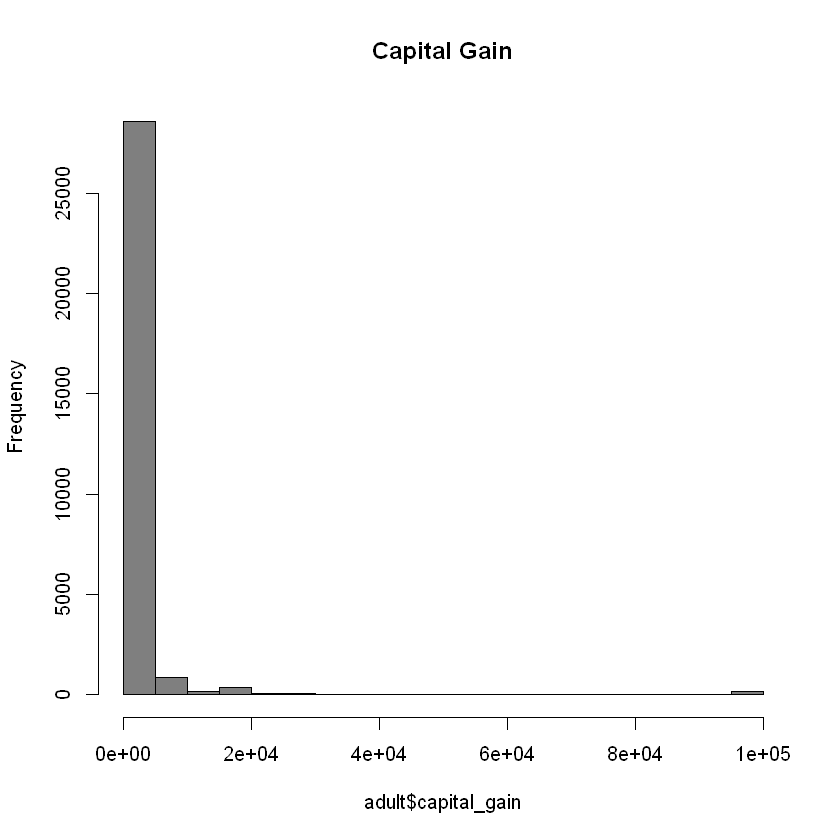

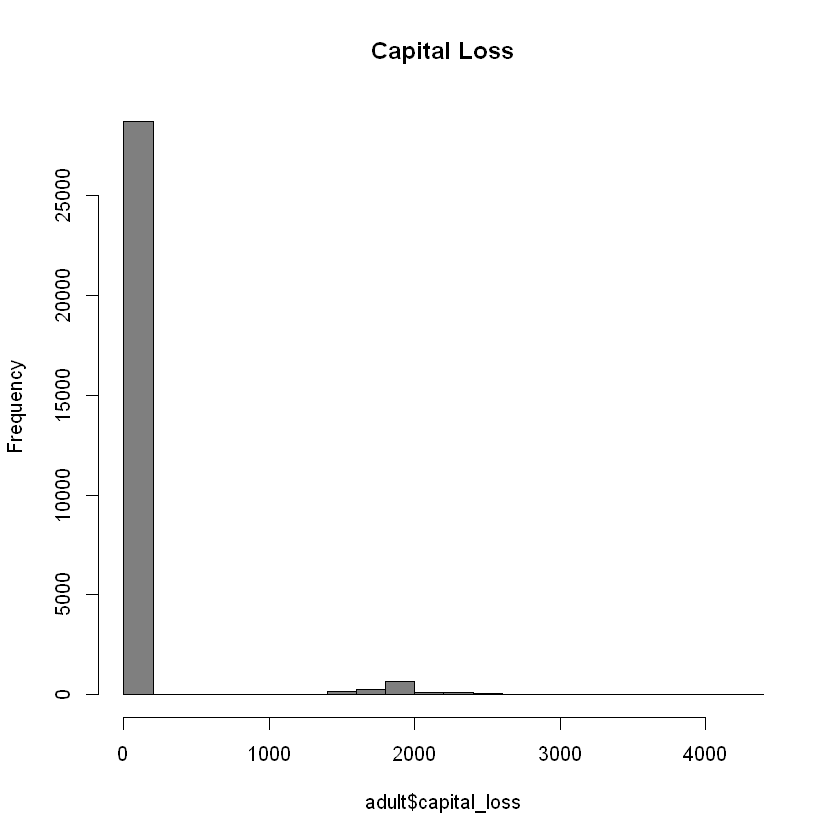

In [16]:
hist(adult$capital_gain, col='grey50', main="Capital Gain")
hist(adult$capital_loss, col='grey50', main="Capital Loss")

The capital gain/loss may not be useful for classification as it is quite skewed and mostly concentrated at zero value. 

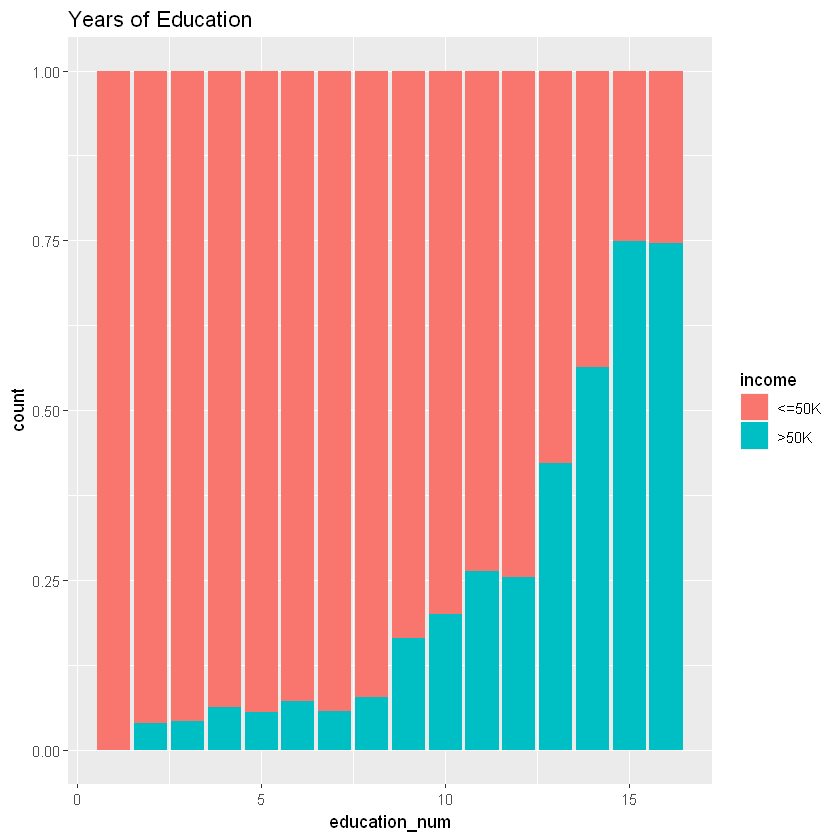

In [17]:
ggplot(adult, aes(x = education_num, fill = income)) + 
    geom_bar(position="fill") +  
    ggtitle("Years of Education")

stay hungry,stay foolish---for more income...

remove some columns from the dataset based on the previous research on data
then divide the dataset of 50-50, 60-40, and 70-30

In [76]:
adult_del <- adult[, -c(3,4, 11, 12, 14)]
#move income to the first column
adult_del <- adult_del[,c(10, 1:9)]
attach(adult_del)

adult_del

The following objects are masked from adult_del (pos = 3):

    age, education_num, hours_per_week, income, marital_status,
    occupation, race, relationship, sex, workclass

The following objects are masked from adult_del (pos = 6):

    age, education_num, hours_per_week, income, marital_status,
    occupation, race, relationship, sex, workclass

The following objects are masked from adult_del (pos = 7):

    age, education_num, hours_per_week, income, marital_status,
    occupation, race, relationship, sex, workclass

The following objects are masked from adult_del (pos = 9):

    age, education_num, hours_per_week, income, marital_status,
    occupation, race, relationship, sex, workclass

The following objects are masked from adult_del (pos = 10):

    age, education_num, hours_per_week, income, marital_status,
    occupation, race, relationship, sex, workclass

The following objects are masked from adult_del (pos = 11):

    age, education_num, hours_per_week, income, marital_st

,income,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week
1,<=50K,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40
2,<=50K,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13
3,<=50K,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40
4,<=50K,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40
5,<=50K,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40
6,<=50K,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40
7,<=50K,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16
8,>50K,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45
9,>50K,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,50
10,>50K,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40


In [77]:
set.seed(2)
train1 <- sample(1:length(income), length(income)*0.5)
adult.train1 <- adult_del[train1,]
adult.test1 <- adult_del[-train1,]

train2 <- sample(1:length(income), length(income)*0.6)
adult.train2 <- adult_del[train2,]
adult.test2 <- adult_del[-train2,]

train3 <- sample(1:length(income), length(income)*0.7)
adult.train3 <- adult_del[train3,]
adult.test3 <- adult_del[-train3,]
str(adult.test3)

'data.frame':	9049 obs. of  10 variables:
 $ income        : Factor w/ 2 levels " <=50K"," >50K": 1 1 1 1 1 2 2 1 2 1 ...
 $ age           : int  50 38 53 28 49 52 31 32 40 35 ...
 $ workclass     : Factor w/ 9 levels " ?"," Federal-gov",..: 7 5 5 5 5 7 5 5 5 2 ...
 $ education_num : int  13 9 7 13 5 9 14 9 16 5 ...
 $ marital_status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 3 1 3 3 4 3 5 5 3 3 ...
 $ occupation    : Factor w/ 15 levels " ?"," Adm-clerical",..: 5 7 7 11 9 5 11 8 11 6 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 1 2 1 6 2 1 2 5 1 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 3 3 3 5 5 5 5 3 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 1 1 2 1 2 2 2 ...
 $ hours_per_week: int  13 40 40 40 16 45 50 40 60 40 ...


In [78]:
adult.model <- model.matrix(income~.-1, adult_del)
model.train <- adult.model[train1,]
model.test <- adult.model[-train1,]
income.train <- income[train1]
income.test <- income[-train1]
set.seed(2)
knn.fit1 <- knn(model.train, model.test, income.train, k = 5)
knn.table1 <- table(knn.fit1,income.test)
knn.acc1 <- mean(knn.fit1==adult.test1$income)
knn.acc1

[1] 0.8035939

In [63]:
knn.fit2 <- knn(model.train, model.test, income.train, k = 25)
knn.table2 <- table(knn.fit2,income.test)
knn.acc2 <- mean(knn.fit2==adult.test1$income)
knn.acc2

[1] 0.8066441

In [54]:
knn.fit3 <- knn(model.train, model.test, income.train, k = 15)
knn.table3 <- table(knn.fit3,income.test)
knn.acc3 <- mean(knn.fit3==adult.test1$income)
knn.acc3

[1] 0.8080366

when k =15, accuracy is higher then other k values
exlude sex,race and education 
then knn again

In [62]:
adult.model2 <- model.matrix(income~.-1-race-sex, adult_del)
model.train2 <- adult.model2[train1,]
model.test2 <- adult.model2[-train1,]
income.train2 <- income[train1]
income.test2 <- income[-train1]
set.seed(2)
knn.fit4 <- knn(model.train2, model.test2, income.train2, k = 15)
knn.table4 <- table(knn.fit4,income.test2)
knn.acc4 <- mean(knn.fit4==adult.test1$income)
knn.acc4

[1] 0.8079703

turns out sex & race are important factors to be considered.

logistic regression

In [79]:
glmfit <- glm(income~., data=adult.train1, family=binomial)
summary(glmfit)


Call:
glm(formula = income ~ ., family = binomial, data = adult.train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6367  -0.5782  -0.2245  -0.0209   3.7068  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           -8.523873   0.534341 -15.952  < 2e-16 ***
age                                    0.028892   0.002256  12.807  < 2e-16 ***
workclass Local-gov                   -0.783309   0.150108  -5.218 1.81e-07 ***
workclass Private                     -0.607108   0.124344  -4.883 1.05e-06 ***
workclass Self-emp-inc                -0.308857   0.161453  -1.913 0.055750 .  
workclass Self-emp-not-inc            -1.070602   0.145885  -7.339 2.16e-13 ***
workclass State-gov                   -0.964318   0.166693  -5.785 7.25e-09 ***
workclass Without-pay                -12.875633 149.972150  -0.086 0.931583    
education_num                          0.298491   0.012928  23.089  < 2e-16 **

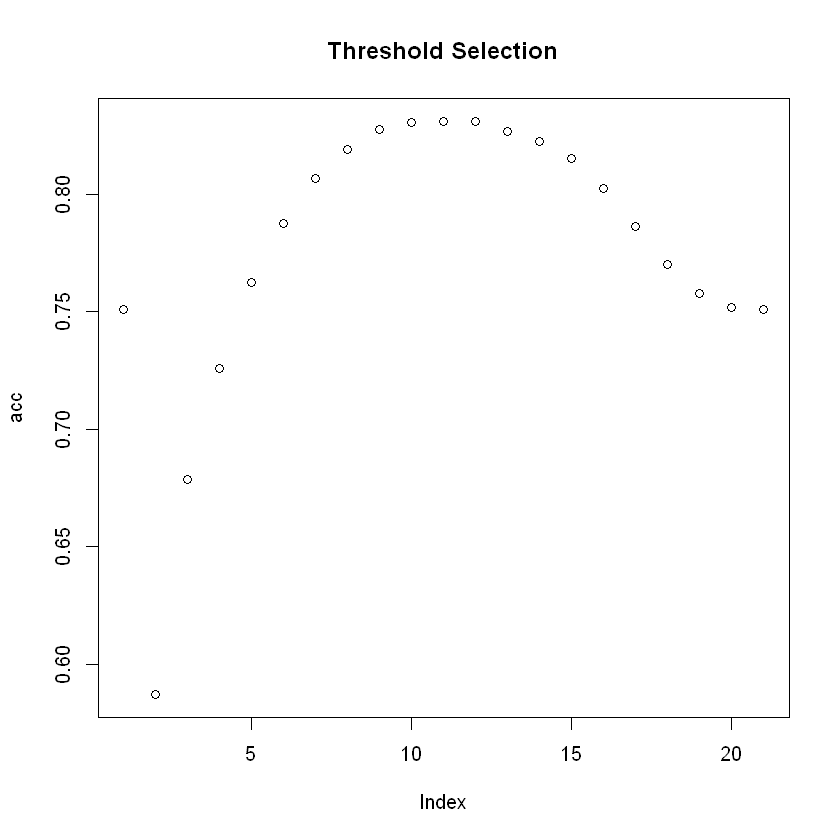

In [80]:
#find the optimal threshold for a best accuracy
threshold <- seq(0, 1, 0.05)
acc <- rep(0, length(threshold))
for (i in 1:length(threshold)) {
  glmprobs <- predict(glmfit, newdata=adult.test1, type = "response")
  glmpred <- rep("<=50k", length(adult.test1$income))
  glmpred[glmprobs > threshold[i]] = ">50k"
  glmtable <- table(glmpred, adult.test1$income)
  acc[i] <- sum(diag(glmtable))/sum(glmtable)
}
plot(acc, main="Threshold Selection")

In [82]:
threshold[which.max(acc)]
log.acc <- acc[which.max(acc)]
log.acc

[1] 0.5

[1] 0.831112

decision tree classifier

In [96]:
library(tree)
tree.income <- tree(income~., data=adult.test1)
tree.pred <- predict(tree.income, newdata=adult.test1, type="class")
summary(tree.income)

Warning message:
"package 'tree' was built under R version 3.4.3"


Classification tree:
tree(formula = income ~ ., data = adult.test1)
Variables actually used in tree construction:
[1] "relationship"  "education_num" "occupation"   
Number of terminal nodes:  5 
Residual mean deviance:  0.7978 = 12030 / 15080 
Misclassification error rate: 0.1834 = 2766 / 15081 

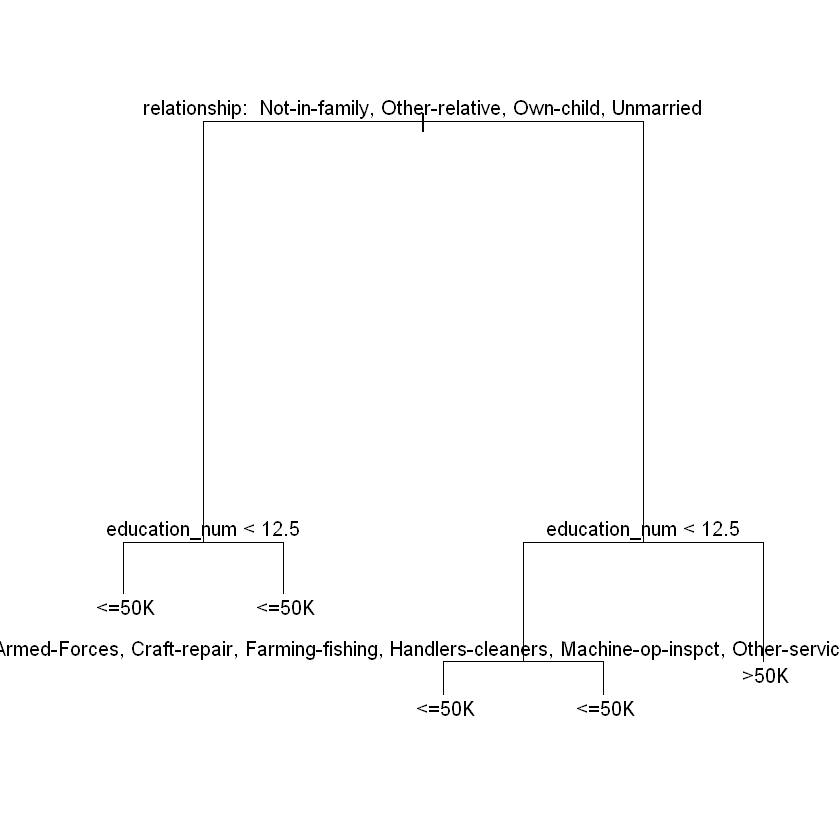

In [97]:
plot(tree.income)
text(tree.income, pretty=0)

In [98]:
tree.table <- table(tree.pred, adult.test1$income)
tree.acc <- mean(tree.pred == adult.test1$income)
tree.acc

[1] 0.8165904